In [1]:
!cd /content/drive/MyDrive/Kaggle

In [2]:
# !kaggle competitions download -c spaceship-titanic
# !mkdir /content/spaceship-titanic
# !unzip spaceship-titanic.zip -d spaceship-titanic

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn import tree
import xgboost as xgb
import lightgbm as lgb

In [4]:
train_df = pd.read_csv('/content/drive/MyDrive/Kaggle/spaceship-titanic/train.csv')
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


###Add New Columns

In [7]:
train_df['GroupId'] = train_df['PassengerId'].astype(str).str[:4]
train_df['CabinSide'] = train_df['Cabin'].astype(str).str[-1]
train_df['CabinDeck'] = train_df['Cabin'].astype(str).str.split('/').str[0]

In [8]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,CabinSide,CabinDeck
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,P,B
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,S,F
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,S,A
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,S,A
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,S,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276,P,A
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278,S,G
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279,S,G
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280,S,E


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  GroupId       8693 non-null   object 
 15  CabinSide     8693 non-null   object 
 16  CabinDeck     8693 non-null   object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1.1+ MB


###Change Data Types

In [10]:
train_df['CryoSleep'] = train_df['CryoSleep'].astype(bool)
train_df['VIP'] = train_df['VIP'].astype(bool)
train_df['GroupId'] = train_df['GroupId'].astype(int)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  GroupId       8693 non-null   int64  
 15  CabinSide     8693 non-null   object 
 16  CabinDeck     8693 non-null   object 
dtypes: bool(3), float64(6), int64(1), object(7)
memory usage: 976.4+ KB


##Exploratory Data Analysis

<Axes: xlabel='Transported', ylabel='count'>

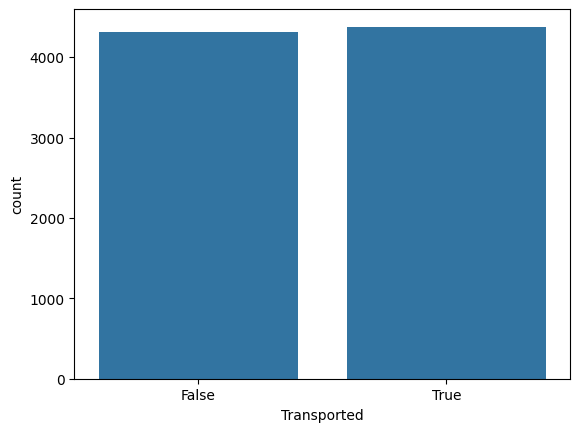

In [12]:
# Simple count plot
sns.countplot(x='Transported', data=train_df)

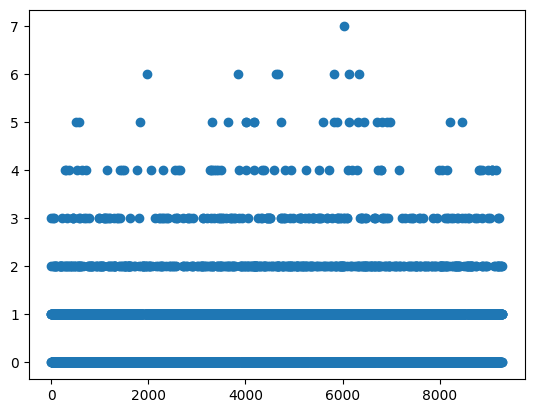

In [13]:
#check most impacted group
groupid_transported = train_df[['GroupId', 'Transported']].groupby(by=['GroupId']).sum().reset_index()
plt.scatter(groupid_transported['GroupId'], groupid_transported['Transported'])

In [14]:
#original distribution of people from each homeplanet
homeplanet_grouped = train_df[['HomePlanet','Transported']].groupby(by=['HomePlanet']).agg(['count','sum'])
homeplanet_grouped['Percentage'] = 100.0*(homeplanet_grouped['Transported', 'sum']/homeplanet_grouped['Transported', 'count'])
homeplanet_grouped

Transported       Percentage
                 count   sum           
HomePlanet                             
Earth             4602  1951  42.394611
Europa            2131  1404  65.884561
Mars              1759   920  52.302445

In [15]:
#check most impacted destination planet
destplanet_grouped = train_df[['Destination','Transported']].groupby(by=['Destination']).agg(['count','sum'])
destplanet_grouped['Percentage'] = 100.0*(destplanet_grouped['Transported', 'sum']/destplanet_grouped['Transported', 'count'])
destplanet_grouped

Transported       Percentage
                    count   sum           
Destination                               
55 Cancri e          1800  1098  61.000000
PSO J318.5-22         796   401  50.376884
TRAPPIST-1e          5915  2787  47.117498

In [16]:
#check most impacted home planet - destination passengers
homedestplanet_grouped = train_df[['HomePlanet','Destination','Transported']].groupby(by=['HomePlanet','Destination']).agg(['count','sum'])
homedestplanet_grouped['Percentage'] = 100.0*(homedestplanet_grouped['Transported', 'sum']/homedestplanet_grouped['Transported', 'count'])
homedestplanet_grouped

Transported       Percentage
                               count   sum           
HomePlanet Destination                               
Earth      55 Cancri e           690   348  50.434783
           PSO J318.5-22         712   355  49.859551
           TRAPPIST-1e          3101  1207  38.922928
Europa     55 Cancri e           886   611  68.961625
           PSO J318.5-22          19    14  73.684211
           TRAPPIST-1e          1189   755  63.498738
Mars       55 Cancri e           193   118  61.139896
           PSO J318.5-22          49    22  44.897959
           TRAPPIST-1e          1475   755  51.186441

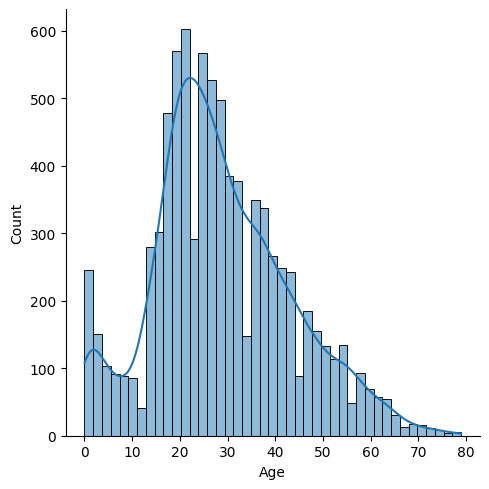

In [17]:
#check Age distribution
sns.displot(x='Age', data=train_df, kde=True)

In [18]:
#were people in cyrosleep impacted?
cryosleep_grouped = train_df[['CryoSleep','Transported']].groupby(by=['CryoSleep']).agg(['count','sum'])
cryosleep_grouped['Percentage'] = 100.0*(cryosleep_grouped['Transported', 'sum']/cryosleep_grouped['Transported', 'count'])
cryosleep_grouped

Transported       Percentage
                count   sum           
CryoSleep                             
False            5439  1789  32.892076
True             3254  2589  79.563614

In [19]:
#were VIPS impacted more than normal people or vice versa?
vip_grouped = train_df[['VIP','Transported']].groupby(by=['VIP']).agg(['count','sum'])
vip_grouped['Percentage'] = 100.0*(vip_grouped['Transported', 'sum']/vip_grouped['Transported', 'count'])
vip_grouped

Transported       Percentage
            count   sum           
VIP                               
False        8291  4198  50.633217
True          402   180  44.776119

In [20]:
#were a certain cabin side people more impacted?
cabinside_grouped = train_df[['CabinSide','Transported']].groupby(by=['CabinSide']).agg(['count','sum'])
cabinside_grouped['Percentage'] = 100.0*(cabinside_grouped['Transported', 'sum']/cabinside_grouped['Transported', 'count'])
cabinside_grouped

Transported       Percentage
                count   sum           
CabinSide                             
P                4206  1898  45.126010
S                4288  2380  55.503731
n                 199   100  50.251256

In [21]:
#cabinside and cyrosleep with transported
cryosleep_cabinside_grouped = train_df[['CryoSleep','CabinSide','Transported']].groupby(by=['CryoSleep','CabinSide']).agg(['count','sum'])
cryosleep_cabinside_grouped['Percentage'] = 100.0*(cryosleep_cabinside_grouped['Transported', 'sum']/cryosleep_cabinside_grouped['Transported', 'count'])
cryosleep_cabinside_grouped

Transported       Percentage
                          count   sum           
CryoSleep CabinSide                             
False     P                2673   749  28.020950
          S                2658  1011  38.036117
          n                 108    29  26.851852
True      P                1533  1149  74.951076
          S                1630  1369  83.987730
          n                  91    71  78.021978

We know from this that CryoSleep and CabinSide are important variables

##Feature Engineering

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  GroupId       8693 non-null   int64  
 15  CabinSide     8693 non-null   object 
 16  CabinDeck     8693 non-null   object 
dtypes: bool(3), float64(6), int64(1), object(7)
memory usage: 976.4+ KB


In [23]:
train_df['Transported'] = train_df['Transported'].astype(int)
X,y = train_df.drop('Transported', axis=1), train_df['Transported']

In [24]:
X = pd.get_dummies(X, columns=["HomePlanet"], prefix=['HomePlanet_is'])
X = pd.get_dummies(X, columns=["Destination"], prefix=['Destination_is'])
X = pd.get_dummies(X, columns=["CabinSide"], prefix=['CabinSide_is'])
X = pd.get_dummies(X, columns=["CabinDeck"], prefix=['CabinDeck_is'])
X = pd.get_dummies(X, columns=["CryoSleep"], prefix=['CryoSleep_is'])
X = pd.get_dummies(X, columns=["VIP"], prefix=['VIP_is'])

In [25]:
X

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupId,...,CabinDeck_is_D,CabinDeck_is_E,CabinDeck_is_F,CabinDeck_is_G,CabinDeck_is_T,CabinDeck_is_nan,CryoSleep_is_False,CryoSleep_is_True,VIP_is_False,VIP_is_True
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,...,0,0,0,0,0,0,1,0,1,0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,2,...,0,0,1,0,0,0,1,0,1,0
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,3,...,0,0,0,0,0,0,1,0,0,1
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,3,...,0,0,0,0,0,0,1,0,1,0
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,4,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,A/98/P,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,9276,...,0,0,0,0,0,0,1,0,0,1
8689,9278_01,G/1499/S,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,9278,...,0,0,0,1,0,0,0,1,1,0
8690,9279_01,G/1500/S,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,9279,...,0,0,0,1,0,0,1,0,1,0
8691,9280_01,E/608/S,32.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,9280,...,0,1,0,0,0,0,1,0,1,0


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PassengerId                   8693 non-null   object 
 1   Cabin                         8494 non-null   object 
 2   Age                           8514 non-null   float64
 3   RoomService                   8512 non-null   float64
 4   FoodCourt                     8510 non-null   float64
 5   ShoppingMall                  8485 non-null   float64
 6   Spa                           8510 non-null   float64
 7   VRDeck                        8505 non-null   float64
 8   Name                          8493 non-null   object 
 9   GroupId                       8693 non-null   int64  
 10  HomePlanet_is_Earth           8693 non-null   uint8  
 11  HomePlanet_is_Europa          8693 non-null   uint8  
 12  HomePlanet_is_Mars            8693 non-null   uint8  
 13  Des

In [27]:
# drop columns
X.drop('PassengerId', axis = 1, inplace = True)
X.drop('Cabin', axis = 1, inplace = True)
X.drop('Name', axis = 1, inplace = True)
X.drop('GroupId', axis = 1, inplace = True)

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           8514 non-null   float64
 1   RoomService                   8512 non-null   float64
 2   FoodCourt                     8510 non-null   float64
 3   ShoppingMall                  8485 non-null   float64
 4   Spa                           8510 non-null   float64
 5   VRDeck                        8505 non-null   float64
 6   HomePlanet_is_Earth           8693 non-null   uint8  
 7   HomePlanet_is_Europa          8693 non-null   uint8  
 8   HomePlanet_is_Mars            8693 non-null   uint8  
 9   Destination_is_55 Cancri e    8693 non-null   uint8  
 10  Destination_is_PSO J318.5-22  8693 non-null   uint8  
 11  Destination_is_TRAPPIST-1e    8693 non-null   uint8  
 12  CabinSide_is_P                8693 non-null   uint8  
 13  Cab

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
X_scaled = scaler.fit_transform(X)

In [30]:
X_scaled

array([[ 0.70209482, -0.33702544, -0.28427377, ..., -0.77348028,
         0.22019607, -0.22019607],
       [-0.33323258, -0.17352835, -0.27868854, ..., -0.77348028,
         0.22019607, -0.22019607],
       [ 2.01350954, -0.27252659,  1.93492201, ..., -0.77348028,
        -4.54140706,  4.54140706],
       ...,
       [-0.19518893, -0.33702544, -0.28427377, ..., -0.77348028,
         0.22019607, -0.22019607],
       [ 0.21894203, -0.33702544,  0.36671515, ..., -0.77348028,
         0.22019607, -0.22019607],
       [ 1.04720396, -0.1480288 ,  2.6250075 , ..., -0.77348028,
         0.22019607, -0.22019607]])

In [31]:
sum(np.isnan(X_scaled))

array([179, 181, 183, 208, 183, 188,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0])

In [32]:
X_scaled = np.nan_to_num(X_scaled)

In [33]:
sum(np.isnan(X_scaled))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

##ML Models

In [34]:
# split training data into train, validation and test splits.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(5215, 28)
(1739, 28)
(1739, 28)
(5215,)
(1739,)
(1739,)


In [35]:
def print_metrices(classifier, X_test, pred, true):
    print(classification_report(true,pred))
    print("Accuracy : ",accuracy_score(true, pred))
    print("Precison : ",precision_score(true, pred , average = 'weighted'))
    print("Recall : ",recall_score(true, pred,  average = 'weighted'))
    print("F1 : ",f1_score(true, pred,  average = 'weighted'))
    print("Mean Squared Error (MSE):", mean_squared_error(true, pred))
    print("Root Mean Squared Error (RMSE):", mean_squared_error(true, pred, squared=False))
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, true, cmap=plt.cm.YlGnBu, normalize='true')
    plt.show()
    print()

def evaluate(classifier, X_train, y_train, X_val, y_val, X_test, y_test):
    print("Training Scores:")
    print_metrices(classifier, X_train, classifier.predict(X_train), y_train)
    print("Validation Scores:")
    print_metrices(classifier, X_val, classifier.predict(X_val), y_val)
    print("Test Scores:")
    print_metrices(classifier, X_test, classifier.predict(X_test), y_test)

In [36]:
# Logistic Regression
parm_dict = {'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1], 'solver':['newton-cg', 'lbfgs', 'liblinear']}
grid_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=parm_dict, cv=10, verbose=1, n_jobs=-1)
grid_lr.fit(X_train,y_train)
print(grid_lr.best_score_)
print(grid_lr.best_estimator_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
0.7932920775696605
LogisticRegression(C=0.5, solver='newton-cg')


Training Scores:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      2574
           1       0.79      0.82      0.80      2641

    accuracy                           0.79      5215
   macro avg       0.79      0.79      0.79      5215
weighted avg       0.79      0.79      0.79      5215

Accuracy :  0.7944391179290509
Precison :  0.7947873038746966
Recall :  0.7944391179290509
F1 :  0.7943086886626575
Mean Squared Error (MSE): 0.2055608820709492
Root Mean Squared Error (RMSE): 0.45338822445113103


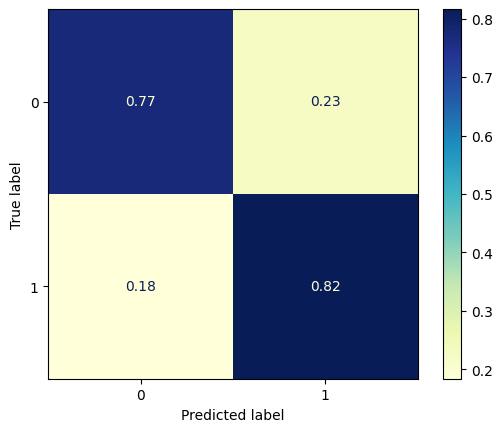


Validation Scores:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       880
           1       0.78      0.81      0.79       859

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

Accuracy :  0.7935595169637722
Precison :  0.7939694013087017
Recall :  0.7935595169637722
F1 :  0.7935436792358246
Mean Squared Error (MSE): 0.20644048303622772
Root Mean Squared Error (RMSE): 0.4543572196369589


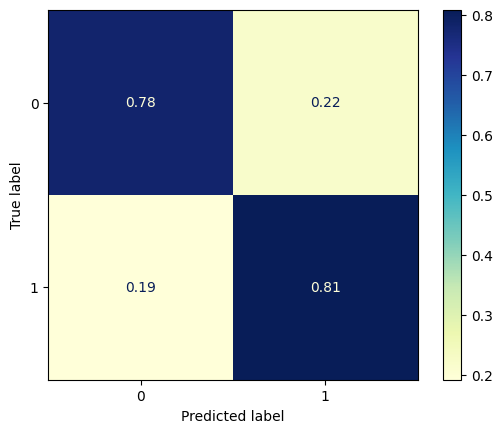


Test Scores:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       861
           1       0.76      0.81      0.78       878

    accuracy                           0.77      1739
   macro avg       0.78      0.77      0.77      1739
weighted avg       0.78      0.77      0.77      1739

Accuracy :  0.7745830937320299
Precison :  0.77591780371788
Recall :  0.7745830937320299
F1 :  0.7741958400429259
Mean Squared Error (MSE): 0.2254169062679701
Root Mean Squared Error (RMSE): 0.4747809034364905


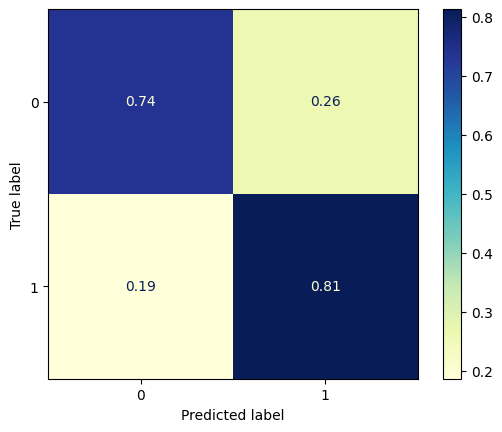

In [37]:
clf_lr = grid_lr.best_estimator_
clf_lr.fit(X_train, y_train)
evaluate(clf_lr, X_train, y_train, X_val, y_val, X_test, y_test)

Training Scores:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76      2574
           1       0.80      0.65      0.72      2641

    accuracy                           0.74      5215
   macro avg       0.75      0.74      0.74      5215
weighted avg       0.75      0.74      0.74      5215

Accuracy :  0.7395973154362416
Precison :  0.7487465434584033
Recall :  0.7395973154362416
F1 :  0.7376523853968796
Mean Squared Error (MSE): 0.26040268456375837
Root Mean Squared Error (RMSE): 0.5102966632888739


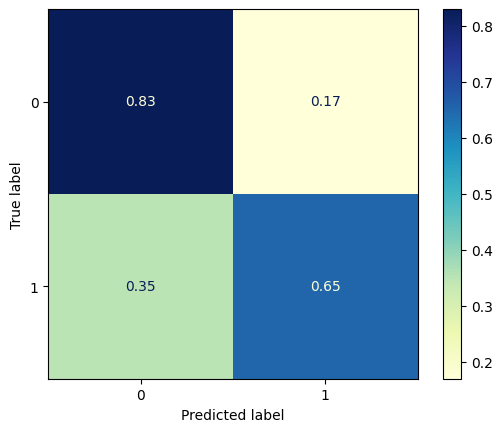


Validation Scores:
              precision    recall  f1-score   support

           0       0.70      0.82      0.76       880
           1       0.78      0.64      0.70       859

    accuracy                           0.73      1739
   macro avg       0.74      0.73      0.73      1739
weighted avg       0.74      0.73      0.73      1739

Accuracy :  0.7343300747556066
Precison :  0.7411691491918417
Recall :  0.7343300747556066
F1 :  0.7319968722240968
Mean Squared Error (MSE): 0.2656699252443933
Root Mean Squared Error (RMSE): 0.5154317852484394


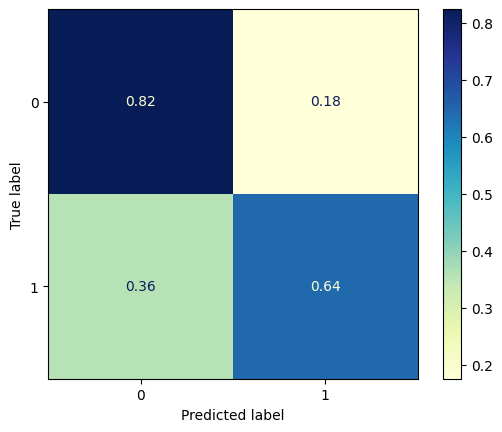


Test Scores:
              precision    recall  f1-score   support

           0       0.70      0.80      0.75       861
           1       0.78      0.67      0.72       878

    accuracy                           0.73      1739
   macro avg       0.74      0.73      0.73      1739
weighted avg       0.74      0.73      0.73      1739

Accuracy :  0.7337550316273721
Precison :  0.7390554090872062
Recall :  0.7337550316273721
F1 :  0.7325618836179464
Mean Squared Error (MSE): 0.26624496837262795
Root Mean Squared Error (RMSE): 0.5159893103278671


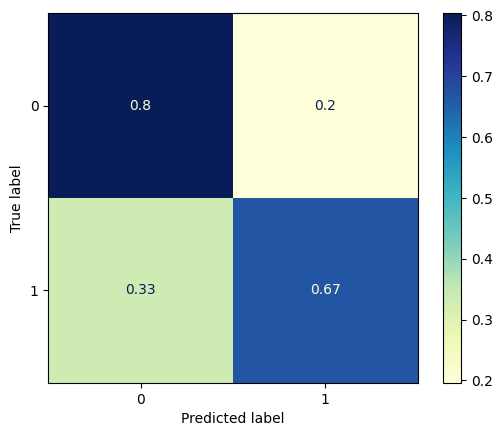

In [38]:
# Naives Bayes
clf_nb = BernoulliNB(alpha=1, fit_prior=True, class_prior=None)
clf_nb.fit(X_train, y_train)
evaluate(clf_nb, X_train, y_train, X_val, y_val, X_test, y_test)

In [39]:
# Linear SVM
parm_dict = {'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]}
grid_svm = GridSearchCV(estimator=LinearSVC(),param_grid=parm_dict,verbose=1, n_jobs=-1)
grid_svm.fit(X_train,y_train)
print(grid_svm.best_score_)
print(grid_svm.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.790987535953979
LinearSVC(C=0.3)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training Scores:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      2574
           1       0.79      0.81      0.80      2641

    accuracy                           0.79      5215
   macro avg       0.79      0.79      0.79      5215
weighted avg       0.79      0.79      0.79      5215

Accuracy :  0.7923298178331736
Precison :  0.7924275163493572
Recall :  0.7923298178331736
F1 :  0.7922701600602543
Mean Squared Error (MSE): 0.20767018216682645
Root Mean Squared Error (RMSE): 0.45570843986789017


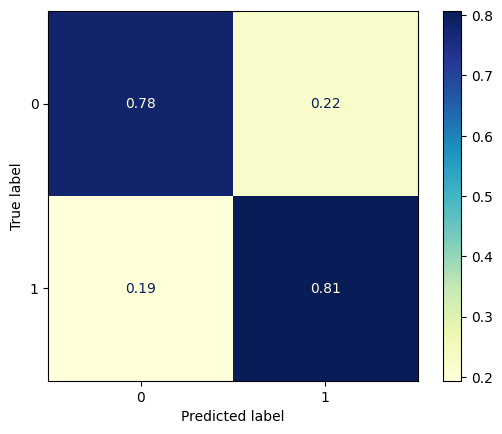


Validation Scores:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       880
           1       0.78      0.80      0.79       859

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

Accuracy :  0.7941345600920069
Precison :  0.7943473885789469
Recall :  0.7941345600920069
F1 :  0.7941359215818944
Mean Squared Error (MSE): 0.2058654399079931
Root Mean Squared Error (RMSE): 0.4537239688488951


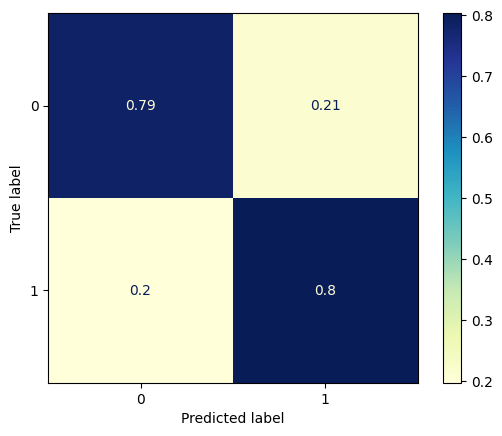


Test Scores:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       861
           1       0.77      0.81      0.79       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739

Accuracy :  0.777458309373203
Precison :  0.7781542387177809
Recall :  0.777458309373203
F1 :  0.7772366537890918
Mean Squared Error (MSE): 0.22254169062679702
Root Mean Squared Error (RMSE): 0.4717432465089426


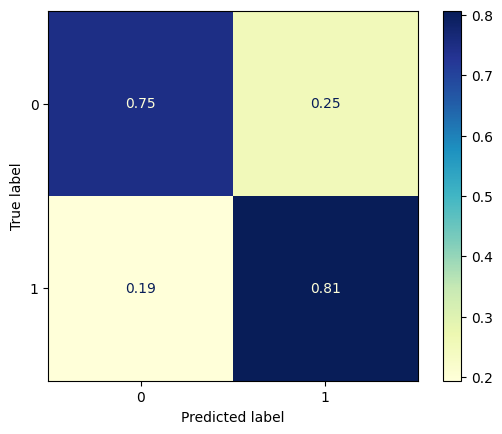

In [40]:
clf_sgd = grid_svm.best_estimator_
clf_sgd.fit(X_train, y_train)
evaluate(clf_sgd, X_train, y_train, X_val, y_val, X_test, y_test)

In [41]:
# Decision Trees
parm_dict = {"criterion": ["gini", "entropy"], "max_depth":range(1,10), "min_samples_split":range(1,10), "min_samples_leaf":range(1,5)}
grid_dt = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parm_dict, cv=10, verbose=1, n_jobs=-1)
grid_dt.fit(X_train,y_train)
print(grid_dt.best_score_)
print(grid_dt.best_estimator_)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
0.7731517638493614
DecisionTreeClassifier(max_depth=9, min_samples_split=5)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
720 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _val

Training Scores:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      2574
           1       0.83      0.83      0.83      2641

    accuracy                           0.83      5215
   macro avg       0.83      0.83      0.83      5215
weighted avg       0.83      0.83      0.83      5215

Accuracy :  0.8264621284755513
Precison :  0.8264632167107903
Recall :  0.8264621284755513
F1 :  0.8264516991598175
Mean Squared Error (MSE): 0.17353787152444872
Root Mean Squared Error (RMSE): 0.41657876989166015


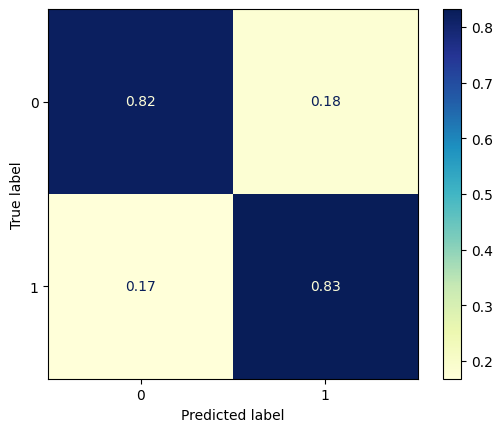


Validation Scores:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       880
           1       0.77      0.77      0.77       859

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

Accuracy :  0.7745830937320299
Precison :  0.7745773825470732
Recall :  0.7745830937320299
F1 :  0.7745710153978888
Mean Squared Error (MSE): 0.2254169062679701
Root Mean Squared Error (RMSE): 0.4747809034364905


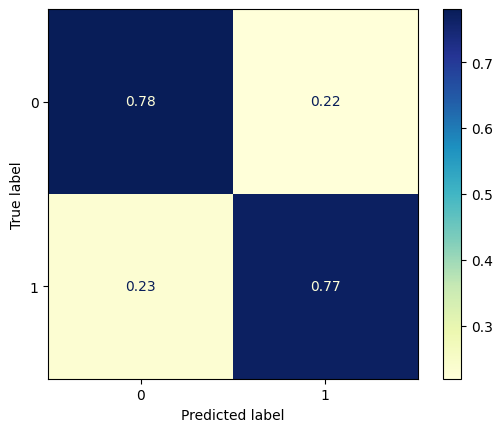


Test Scores:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       861
           1       0.76      0.78      0.77       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739

Accuracy :  0.765382403680276
Precison :  0.7655214790323684
Recall :  0.765382403680276
F1 :  0.7653060204552067
Mean Squared Error (MSE): 0.23461759631972398
Root Mean Squared Error (RMSE): 0.4843734058758015


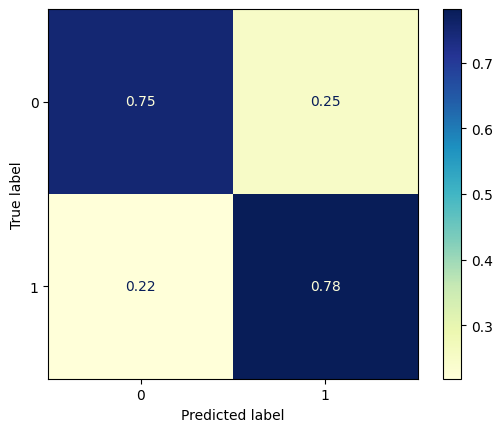

In [42]:
clf_dt = grid_dt.best_estimator_
clf_dt.fit(X_train, y_train)
evaluate(clf_dt, X_train, y_train, X_val, y_val, X_test, y_test)

In [ ]:
# Neural Nets
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['logistic', 'relu'],
    'solver': ['lbfgs', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
grid_nn = GridSearchCV(estimator=MLPClassifier(),param_grid=parameter_space,verbose=1, n_jobs=-1)
grid_nn.fit(X_train,y_train)
print(grid_nn.best_score_)
print(grid_nn.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
clf_nn = MLPClassifier(activation='logistic', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
clf_nn.fit(X_train, y_train)
evaluate(clf_nn, X_train, y_train, X_val, y_val, X_test, y_test)

In [ ]:
# LightGBM
parm_dict = {'boosting_type':['gbdt','dart','rf'],'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01],'num_leaves':[16, 32, 64, 100, 200],
             'max_depth': [1,2,5,10,20,50],'n_estimators': [50, 100, 200]}
grid_gb = GridSearchCV(estimator=lgb.LGBMClassifier(),param_grid=parm_dict,verbose=1, n_jobs=-1)
grid_gb.fit(X_train,y_train)
print(grid_gb.best_score_)
print(grid_gb.best_estimator_)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


In [ ]:
clf_lgbm = GradientBoostingClassifier()
clf_lgbm.fit(X_train, y_train)
evaluate(clf_lgbm, X_train, y_train, X_val, y_val, X_test, y_test)

In [ ]:
# XGBoost
parm_dict = {'max_depth': [3, 5, 7],'learning_rate': [0.1, 0.01, 0.001],'subsample': [0.5, 0.7, 1]}
grid_xgb = GridSearchCV(estimator=xgb.XGBClassifier(),param_grid=parm_dict,verbose=1, n_jobs=-1)
grid_xgb.fit(X_train,y_train)
print(grid_xgb.best_score_)
print(grid_xgb.best_estimator_)

In [ ]:
clf_xgbm = xgb.XGBClassifier()
clf_xgbm.fit(X_train, y_train)
evaluate(clf_xgbm, X_train, y_train, X_val, y_val, X_test, y_test)

###Model Comparison

In [ ]:
models = [clf_nb, clf_lr, clf_dt, clf_sgd, clf_nn, clf_lgbm, clf_xgbm]
f1_s = []
for i in models:
    f1 = f1_score(y_test, i.predict(X_test),  average = 'weighted')
    f1_s.append(f1)
f1_percent = [element * 100 for element in f1_s]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Linear SVM', 'Neural Net', 'Gradient Boosting', 'Stacking']
ax.bar(models,acc_percent)
plt.ylim(85,95) # focus on top
plt.xticks(rotation=45)
plt.ylabel("Accuracy for X_test")
plt.show()

In [ ]:
models = [clf_nb, clf_lr, clf_dt, clf_sgd, clf_nn, clf_lgbm, clf_xgbm]
acc_s = []
for i in models:
    acc = accuracy_score(y_test, i.predict(X_test))
    acc_s.append(acc)
acc_percent = [element * 100 for element in acc_s]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Linear SVM', 'Neural Net', 'Gradient Boosting', 'Stacking']
ax.bar(models,acc_percent)
plt.ylim(85,95) # focus on top
plt.xticks(rotation=45)
plt.ylabel("Accuracy for X_test")
plt.show()

## Final Prediction

In [ ]:
# test_df = pd.read_csv('/content/drive/MyDrive/Kaggle/spaceship-titanic/test.csv')

# test_df['GroupId'] = test_df['PassengerId'].astype(str).str[:4]
# test_df['CabinSide'] = test_df['Cabin'].astype(str).str[-1]
# test_df['CryoSleep'] = test_df['CryoSleep'].astype(bool)
# test_df['VIP'] = test_df['VIP'].astype(bool)
# test_df['GroupId'] = test_df['GroupId'].astype(int)

# test_df.head()